<a href="https://colab.research.google.com/github/Sayan-Bhl/Online-Payment-Fraud-Detection-using-BFloat16/blob/main/Copy_of_Online_Payment_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Collection

In [ ]:
data_set=pd.read_csv('/content/drive/MyDrive/online_payment_fraud_detection.csv')
data_set.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data_set.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Data Visualization

In [ ]:
data_set['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
data_set.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

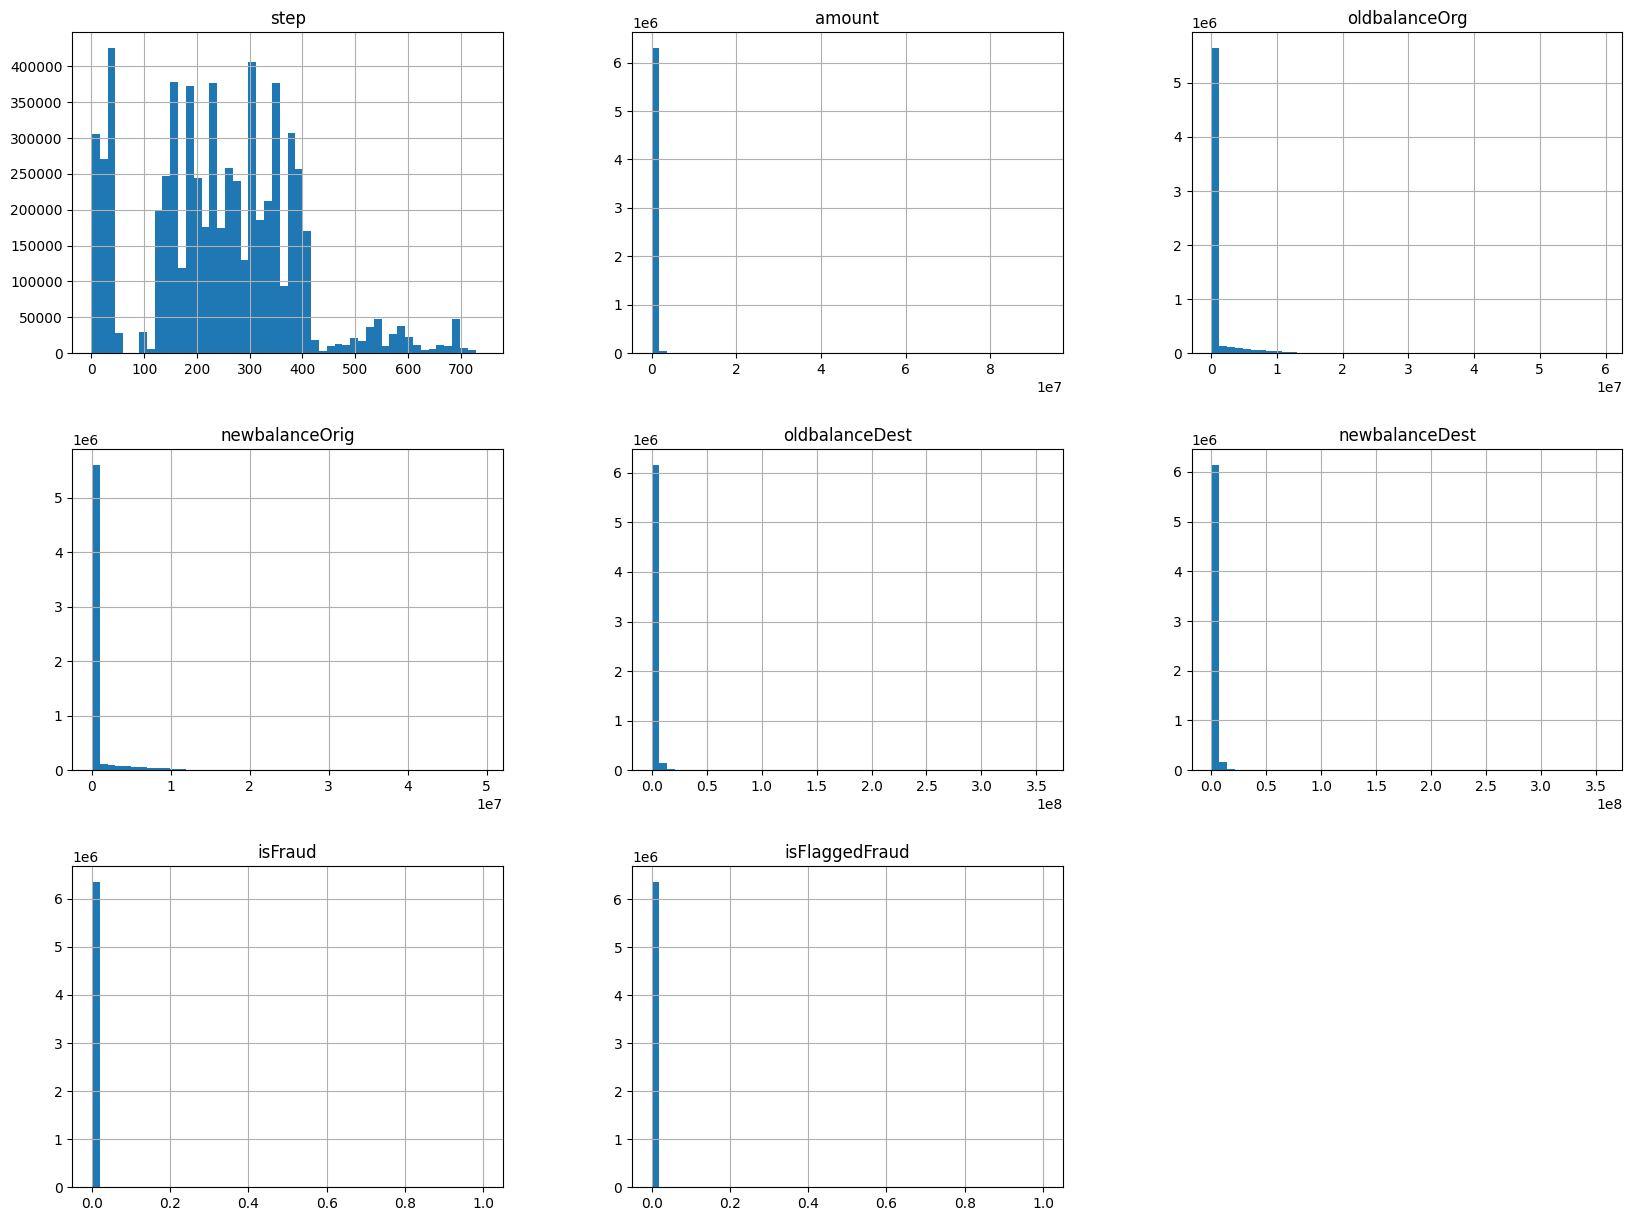

In [ ]:
data_set.hist(bins=50, figsize=(20,15))
plt.show()

(CASH_OUT    2237500
 PAYMENT     2151495
 CASH_IN     1399284
 TRANSFER     532909
 DEBIT         41432
 Name: type, dtype: int64,
 <Axes: xlabel='type', ylabel='count'>)

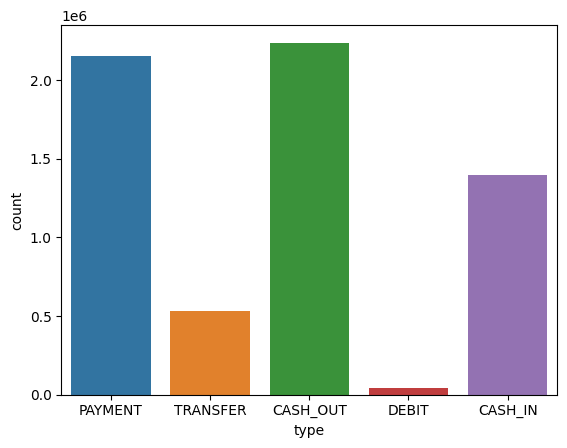

In [ ]:
data_set['type'].value_counts(),sns.countplot(x='type', data=data_set)

(CASH_OUT    4116
 TRANSFER    4097
 Name: type, dtype: int64,
 <Axes: xlabel='type', ylabel='count'>)

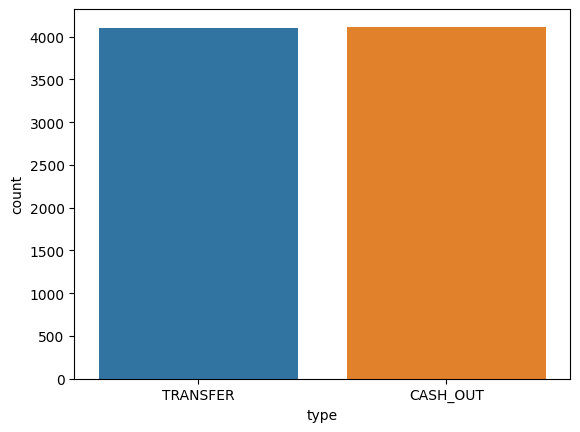

In [ ]:
data_fraud=data_set[data_set.isFraud==1]
data_fraud['type'].value_counts(),sns.countplot(x='type', data=data_fraud)

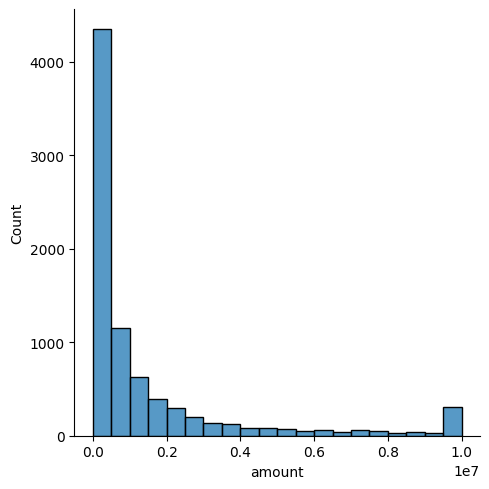

In [ ]:
sns.displot(x='amount',data=data_fraud, bins=20)

<Axes: xlabel='type', ylabel='amount'>

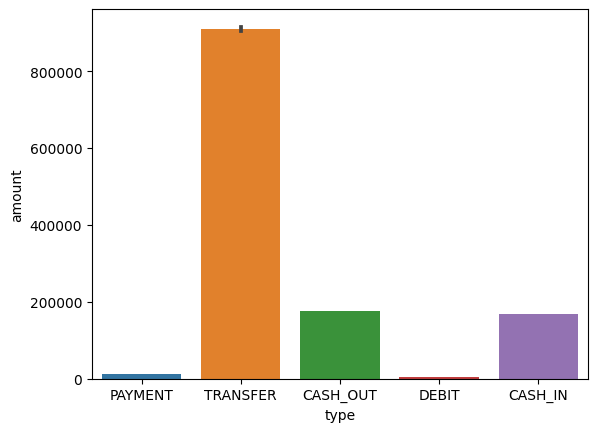

In [ ]:
sns.barplot(x='type', y='amount', data=data_set)

<ipython-input-13-8b55fb86903c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_set.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)


<Axes: >

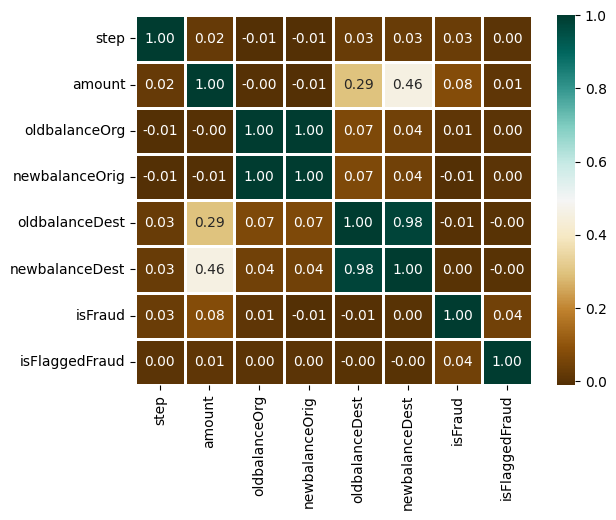

In [ ]:
sns.heatmap(data_set.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

# Data Preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False, drop='first')
encoded_data=encoder.fit_transform(data_set[['type']])
ohe_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(input_features=['type']))
encoded_data_set= pd.concat([data_set, ohe_data], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_data_set.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.0,0.0,1.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.0,0.0,1.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.0,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.0,0.0,1.0,0.0


In [ ]:
#drop unnecessary columns
X = encoded_data_set.drop(['isFraud', 'type', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
Y = encoded_data_set['isFraud']

In [ ]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,1.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,0.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
#SMOTE oversampling
from imblearn .over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train, Y_train=smote.fit_resample(X_train, Y_train)

In [ ]:
X_train.shape, Y_train.shape

((10167052, 10), (10167052,))

# Model Training

In [ ]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

without **bfloat16**

In [ ]:
rfc_model1 = RandomForestClassifier(n_estimators=7, criterion='entropy',random_state=7)

In [ ]:
%%time
start_time = time.time()
rfc_model1.fit(X_train, Y_train)
end_time = time.time()
model1_training_time = end_time - start_time

CPU times: user 3min 51s, sys: 3.21 s, total: 3min 54s
Wall time: 3min 56s


In [ ]:
Y_pred = rfc_model1.predict(X_train)
accuracy = accuracy_score(Y_train, Y_pred)
print("Accuracy in Train set:", accuracy)
Y_pred = rfc_model1.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy in Test set:", accuracy)

Accuracy in Train set: 0.9999686241400162
Accuracy in Test set: 0.9993021742615463


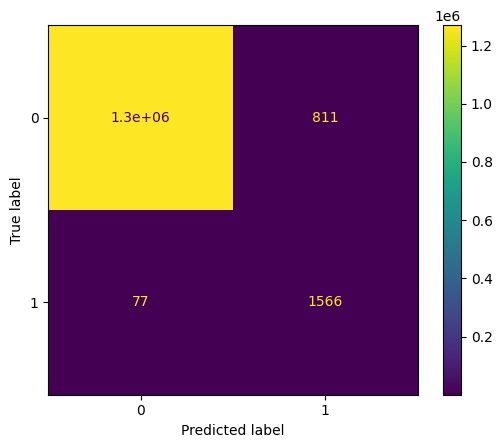

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions( Y_test, Y_pred)

**with bfloat16**

In [ ]:
X_train_bfloat16 = tf.convert_to_tensor(X_train, dtype=tf.bfloat16)
Y_train_bfloat16 = tf.convert_to_tensor(Y_train, dtype=tf.bfloat16)#cast()

In [ ]:
X_test_bfloat16 = tf.convert_to_tensor(X_test, dtype=tf.bfloat16)
Y_test_bfloat16 = tf.convert_to_tensor(Y_test, dtype=tf.bfloat16)#cast()

In [ ]:
rfc_model2=RandomForestClassifier(n_estimators=7, criterion='entropy',random_state=7,)

In [ ]:
%%time
start_time = time.time()
rfc_model2.fit(X_train_bfloat16, Y_train_bfloat16)
end_time = time.time()
model2_training_time = end_time - start_time

CPU times: user 1min 55s, sys: 2.62 s, total: 1min 58s
Wall time: 1min 58s


In [ ]:
Y_pred_bfloat16 = rfc_model2.predict(X_train_bfloat16)
accuracy_bfloat16 = accuracy_score(Y_train_bfloat16, Y_pred_bfloat16)
print("Accuracy in Train set:", accuracy_bfloat16)

Y_pred_bfloat16 = rfc_model2.predict(X_test_bfloat16)
accuracy_bfloat16 = accuracy_score(Y_test_bfloat16, Y_pred_bfloat16)
print("Accuracy in Test set:", accuracy_bfloat16)

Accuracy in Train set: 0.9999646898629022
Accuracy in Test set: 0.9992715265095197


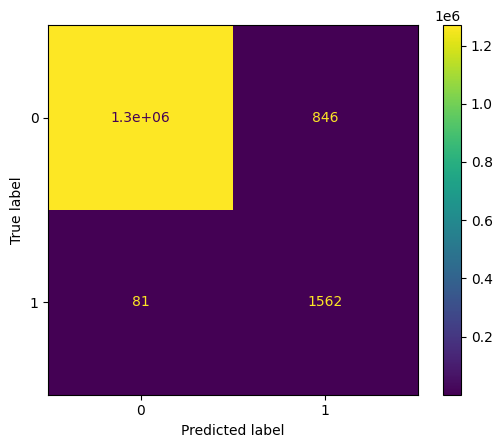

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions( Y_test_bfloat16, Y_pred_bfloat16)

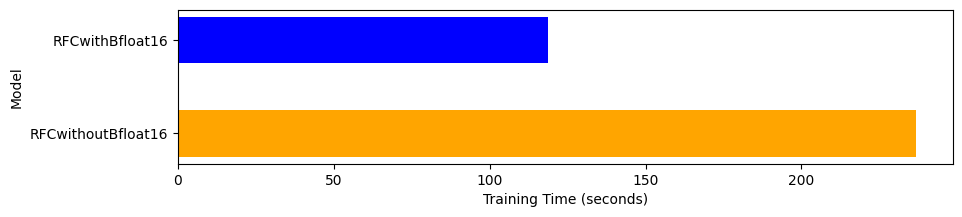

In [ ]:
plt.figure(figsize=(10, 2))
plt.barh(['RFCwithoutBfloat16', 'RFCwithBfloat16'], [model1_training_time, model2_training_time],height=0.5,color=['orange','blue'])
plt.ylabel('Model')
plt.xlabel('Training Time (seconds)')
plt.show()